## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview

df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.

df = df.rename(columns={"Mouse ID":"mouse", "Drug Regimen":"drug", "Sex":"sex", "Age_months":"age", 
             "Weight (g)":"weight", "Timepoint":"timepoint", 
             "Tumor Volume (mm3)":"tum_vol", "Metastatic Sites":"meta_sites"
            })

df.mouse.nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df[df.duplicated(subset=["mouse", "timepoint"])]

,mouse,drug,sex,age,weight,timepoint,tum_vol,meta_sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

g989 = df[df["mouse"]=="g989"]
g989

,mouse,drug,sex,age,weight,timepoint,tum_vol,meta_sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = df[df["mouse"] != "g989"]
clean_df

,mouse,drug,sex,age,weight,timepoint,tum_vol,meta_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_df["mouse"].nunique()

248

In [28]:
clean_df[clean_df["mouse"] == "c326"]

,mouse,drug,sex,age,weight,timepoint,tum_vol,meta_sites
668,c326,Infubinol,Female,18,25,0,45.000000,0
669,c326,Infubinol,Female,18,25,5,36.321346,0


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

df = clean_df.copy()

drugs = df["drug"].unique()

drug_grp = df.groupby("drug")

means = drug_grp["tum_vol"].mean()
medians = drug_grp["tum_vol"].median()
variances = drug_grp["tum_vol"].var()
stds = drug_grp["tum_vol"].std()
sems = drug_grp["tum_vol"].sem()

summ_df1 = pd.concat({"Mean":means, "Median":medians, "Var":variances, "Std":stds, "Sem":sems}, axis=1)
summ_df1

,Mean,Median,Var,Std,Sem
drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ_df2 = df.groupby("drug").agg({"tum_vol": ["mean", "median", "var", "std", "sem"]})
summ_df2


tum_vol                                          
                mean     median        var       std       sem
drug                                                          
Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin   52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril   55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol   54.331565  52.509285  66.173479  8.134708  0.596466
Placebo    54.033581  52.288934  61.168083  7.821003  0.581331
Propriva   52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane   40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn   54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='drug'>

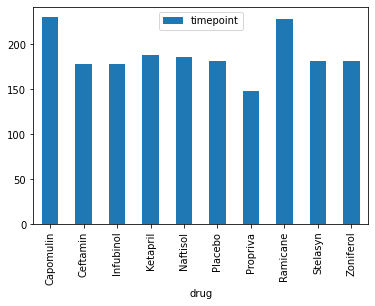

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

df.groupby("drug")["timepoint"].count().to_frame().plot.bar()

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Timepoints'>

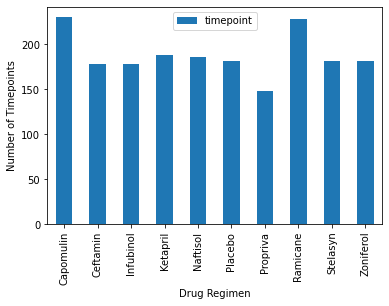

In [10]:
(df
  .groupby("drug")
  ["timepoint"]
  .count()
  .to_frame() 
  .plot.bar(xlabel="Drug Regimen", ylabel="Number of Timepoints")

)

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



array([<AxesSubplot:ylabel='mouse'>], dtype=object)

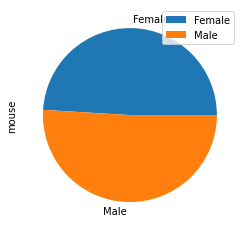

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

(df
  .groupby("sex")
  ["mouse"]
  .count()
  .to_frame()
  .plot.pie(subplots=True)
)

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

grp_df = (df
  .groupby(["drug", "mouse"])
  ["timepoint"]
  .max()
               
)

# I got a major prob here with losing a data point on Inf mouse "c326"

# df.loc[grp_df, "tum_vol"]


ValueError: Cannot index with multidimensional key

In [15]:
# Get into the multiindex

final_df.index.levels    

FrozenList([['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], ['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', ...]])

In [16]:
# Make a dict to hold each final tumor vol data for each of 4 drugs of interest

drugs_dict={}

for drug in drugs:
    drugs_dict[drug] = final_df.loc[drug]

In [17]:
drugs_dict["Capomulin"]

,timepoint,tum_vol
mouse,,
b128,45,45.651331
b742,45,45.000000
f966,20,45.000000
g288,45,46.304003
g316,45,46.809225
i557,45,47.685963
i738,45,45.595685
j119,45,48.158209
j246,35,46.408361


In [18]:
drugs_dict["Ramicane"]

,timepoint,tum_vol
mouse,,
a411,45,45.466677
a444,45,45.000000
a520,45,45.000000
a644,45,46.910892
c458,30,45.722279
c758,45,46.940945
d251,45,45.000000
e662,45,46.409084
g791,45,45.851531


In [19]:
drugs_dict["Infubinol"]

,timepoint,tum_vol
mouse,,
a203,45,67.973419
a251,45,65.525743
a577,30,57.031862
a685,45,66.083066
c139,45,72.226731
c326,5,45.000000
c895,30,60.969711
e476,45,62.435404
f345,45,60.918767


In [20]:
drugs_dict["Ceftamin"]

,timepoint,tum_vol
mouse,,
a275,45,62.999356
b447,0,45.000000
b487,25,56.057749
b759,30,55.742829
f436,15,48.722078
h531,5,47.784682
j296,45,61.849023
k210,45,68.923185
l471,45,67.748662


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_df = drugs_dict["Capomulin"]["tum_vol"]

capomulin_quartiles = capomulin_df.quantile([.25, .50, .75])

capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_median = capomulin_quartiles[.50]

capomulin_iqr = capomulin_upperq - capomulin_lowerq  

# Determine outliers using upper and lower bounds

capomulin_lbound = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_ubound = capomulin_upperq + (1.5 * capomulin_iqr)

print(f"REPORT FOR: capomulin")
print(f"The lower quartile: {capomulin_lowerq}")
print(f"The upper quartile: {capomulin_upperq}")
print(f"The interquartile range: {capomulin_iqr}")
print(f"The median: {capomulin_median}")
print(f"Values below {capomulin_lbound} could be outliers.")
print(f"Values above {capomulin_ubound} could be outliers.")

print(f"Outliers for this drug? {any(capomulin_df > capomulin_ubound) or any(capomulin_df < capomulin_lbound)}")

REPORT FOR: capomulin
The lower quartile: 45.0
The upper quartile: 46.74900552
The interquartile range: 1.7490055199999972
The the median: 45.89372032
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.
Outliers for this drug? False


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

ramicane_df = drugs_dict["Ramicane"]["tum_vol"]

ramicane_quartiles = ramicane_df.quantile([.25, .50, .75])

ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_median = ramicane_quartiles[.50]

ramicane_iqr = ramicane_upperq - ramicane_lowerq  

# Determine outliers using upper and lower bounds

ramicane_lbound = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_ubound = ramicane_upperq + (1.5 * ramicane_iqr)

print(f"REPORT FOR: ramicane")
print(f"The lower quartile: {ramicane_lowerq}")
print(f"The upper quartile: {ramicane_upperq}")
print(f"The interquartile range: {ramicane_iqr}")
print(f"The median: {ramicane_median}")
print(f"Values below {ramicane_lbound} could be outliers.")
print(f"Values above {ramicane_ubound} could be outliers.")

print(f"Outliers for this drug? {any(ramicane_df > ramicane_ubound) or any(ramicane_df < ramicane_lbound)}")


REPORT FOR: ramicane
The lower quartile: 45.0
The upper quartile: 46.34383237
The interquartile range: 1.3438323700000012
The the median: 45.52187471
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.
Outliers for this drug? False


In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

ceftamin_df = drugs_dict["Ceftamin"]["tum_vol"]

ceftamin_quartiles = ceftamin_df.quantile([.25, .50, .75])

ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_median = ceftamin_quartiles[.50]

ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq  

# Determine outliers using upper and lower bounds

ceftamin_lbound = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_ubound = ceftamin_upperq + (1.5 * ceftamin_iqr)

print(f"REPORT FOR: ceftamin")
print(f"The lower quartile: {ceftamin_lowerq}")
print(f"The upper quartile: {ceftamin_upperq}")
print(f"The interquartile range: {ceftamin_iqr}")
print(f"The median: {ceftamin_median}")
print(f"Values below {ceftamin_lbound} could be outliers.")
print(f"Values above {ceftamin_ubound} could be outliers.")

print(f"Outliers for this drug? {any(ceftamin_df > ceftamin_ubound) or any(ceftamin_df < ceftamin_lbound)}")


REPORT FOR: ceftamin
The lower quartile: 48.72207785
The upper quartile: 64.29983003
The interquartile range: 15.577752179999997
The the median: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Outliers for this drug? False


In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

infubinol_df = drugs_dict["Infubinol"]["tum_vol"]

infubinol_quartiles = infubinol_df.quantile([.25, .50, .75])

infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_median = infubinol_quartiles[.50]

infubinol_iqr = infubinol_upperq - infubinol_lowerq  

# Determine outliers using upper and lower bounds

infubinol_lbound = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_ubound = infubinol_upperq + (1.5 * infubinol_iqr)

print(f"REPORT FOR: infubinol")
print(f"The lower quartile: {infubinol_lowerq}")
print(f"The upper quartile: {infubinol_upperq}")
print(f"The interquartile range: {infubinol_iqr}")
print(f"The median: {infubinol_median}")
print(f"Values below {infubinol_lbound} could be outliers.")
print(f"Values above {infubinol_ubound} could be outliers.")

print(f"Outliers for this drug? {any(infubinol_df > infubinol_ubound) or any(infubinol_df < infubinol_lbound)}")

REPORT FOR: infubinol
The lower quartile: 54.04860769
The upper quartile: 65.52574285
The interquartile range: 11.477135160000003
The the median: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outliers for this drug? False


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
